In [1]:
!pip install together
!pip install pandas openpyxl pdfplumber python-docx pytesseract pillow matplotlib fpdf PyMuPDF fitz pdf2image

In [2]:
pip install python-magic


In [3]:
import time

# Wait for 100 seconds between calls
time.sleep(100)


In [4]:
import os
import together

os.environ["TOGETHER_API_KEY"] = "tgp_v1_OtkB6oDYcGvbnScheGQXnuALP9bklewZ4SCm5iXrOJ4"
together.api_key = os.environ["TOGETHER_API_KEY"]


In [6]:
from together import Together

client = Together(api_key=os.environ["TOGETHER_API_KEY"])

def ask_llama(prompt, max_tokens=200):
    try:
        response = client.chat.completions.create(
            model="meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=max_tokens,
            temperature=0.7,
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        return f" Error: {e}"


In [7]:
print(ask_llama("Explain the purpose of data visualization."))


The primary purpose of data visualization is to communicate complex data insights effectively and efficiently to both technical and non-technical stakeholders. Data visualization involves the use of graphical representations, such as charts, graphs, and maps, to present data in a clear and concise manner.

The main goals of data visualization are:

1. **To simplify complex data**: Data visualization helps to break down large datasets into easily understandable components, making it easier to identify patterns, trends, and correlations.
2. **To facilitate understanding and insight**: By presenting data in a visual format, data visualization enables users to quickly grasp the meaning and significance of the data, and to gain insights that might be difficult to extract from raw data.
3. **To support decision-making**: Data visualization provides a clear and concise way to present data-driven insights, enabling decision-makers to make informed choices based on data.
4. **To identify trends

In [8]:
import os
import pandas as pd
import pdfplumber
import docx
import pytesseract
from PIL import Image, ImageDraw, ImageFont
import io
import zipfile
import magic
from fpdf import FPDF
import warnings
warnings.filterwarnings('ignore')

class UltimateFileProcessor:
    def __init__(self):
        self.supported_types = {
            'application/pdf': self.process_pdf,
            'application/vnd.openxmlformats-officedocument.wordprocessingml.document': self.process_docx,
            'text/plain': self.process_txt,
            'application/vnd.ms-excel': self.process_excel,
            'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet': self.process_excel,
            'text/csv': self.process_csv,
            'image/jpeg': self.process_image,
            'image/png': self.process_image,
            'application/octet-stream': self.handle_octet_stream  # Special handler
        }

        self.test_dir = "test_files_ultimate"
        os.makedirs(self.test_dir, exist_ok=True)
        self.generate_perfect_test_files()

    def generate_perfect_test_files(self):
        """Create flawless test files that will definitely work"""
        # PDF with simple text
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=12)
        pdf.cell(200, 10, txt="Sample PDF Text Content", ln=1)
        pdf.cell(200, 10, txt="This PDF contains extractable text", ln=1)
        pdf.output(os.path.join(self.test_dir, "sample.pdf"))

        # DOCX with simple text (saved in a way that ensures detection)
        doc = docx.Document()
        doc.add_paragraph("Sample DOCX Content")
        doc.add_paragraph("This Word document contains simple text.")
        doc.save(os.path.join(self.test_dir, "document.docx"))

        # Excel with simple data
        df = pd.DataFrame({
            'Item': ['Apple', 'Banana', 'Orange'],
            'Quantity': [10, 15, 8],
            'Price': [1.20, 0.50, 0.75]
        })
        df.to_excel(os.path.join(self.test_dir, "data.xlsx"), index=False)
        df.to_csv(os.path.join(self.test_dir, "data.csv"), index=False)

        # Image with clear text
        img = Image.new('RGB', (400, 200), color='white')
        draw = ImageDraw.Draw(img)
        try:
            font = ImageFont.truetype("arial.ttf", 24)
        except:
            font = ImageFont.load_default()
        draw.text((20, 20), "Sample Image Text", font=font, fill='black')
        draw.text((20, 60), "Clear text for OCR", font=font, fill='black')
        img.save(os.path.join(self.test_dir, "image.jpg"))

        # Text file
        with open(os.path.join(self.test_dir, "sample.txt"), 'w') as f:
            f.write("Sample text file\n")
            f.write("Second line of content\n")

    def is_docx(self, file_bytes):
        """Check if file is actually a DOCX by inspecting its structure"""
        try:
            with zipfile.ZipFile(io.BytesIO(file_bytes)) as z:
                return '[Content_Types].xml' in z.namelist()
        except:
            return False

    def get_file_type(self, file_bytes, filename):
        """Ultimate file type detection with multiple fallbacks"""
        # First try magic
        try:
            mime = magic.Magic(mime=True)
            file_type = mime.from_buffer(file_bytes)

            # Handle DOCX misidentification
            if file_type == 'application/zip' and self.is_docx(file_bytes):
                return 'application/vnd.openxmlformats-officedocument.wordprocessingml.document'

            if file_type == 'application/octet-stream' and self.is_docx(file_bytes):
                return 'application/vnd.openxmlformats-officedocument.wordprocessingml.document'

            return file_type
        except:
            pass

        # Fallback to extension checking
        ext = os.path.splitext(filename)[1].lower()
        type_map = {
            '.pdf': 'application/pdf',
            '.docx': 'application/vnd.openxmlformats-officedocument.wordprocessingml.document',
            '.txt': 'text/plain',
            '.xlsx': 'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet',
            '.csv': 'text/csv',
            '.jpg': 'image/jpeg',
            '.jpeg': 'image/jpeg',
            '.png': 'image/png'
        }
        return type_map.get(ext, 'unknown')

    def handle_octet_stream(self, filepath):
        """Special handler for misidentified DOCX files"""
        if self.is_docx(open(filepath, 'rb').read()):
            return self.process_docx(filepath)
        raise ValueError("Unknown file type")

    def process_upload(self, file_bytes, filename):
        """Ultimate processing with bulletproof error handling"""
        try:
            file_type = self.get_file_type(file_bytes, filename)

            if file_type not in self.supported_types:
                return {
                    "status": "error",
                    "message": f"Unsupported file type: {file_type}",
                    "filename": filename
                }

            # Create temp file path
            temp_path = os.path.join(self.test_dir, f"temp_{filename}")
            with open(temp_path, 'wb') as f:
                f.write(file_bytes)

            # Process the file
            processor = self.supported_types[file_type]
            result = processor(temp_path)

            # Clean up
            os.remove(temp_path)

            # Format the response
            response = {
                "status": "success",
                "file_type": file_type,
                "filename": filename
            }

            if isinstance(result, pd.DataFrame):
                response["content_type"] = "dataframe"
                response["data"] = result.to_dict()
                response["preview"] = f"Data with {len(result)} rows"
            else:
                response["content_type"] = "text"
                content = str(result).strip()
                response["content"] = content
                response["preview"] = content[:200] + ("..." if len(content) > 200 else "")

            return response

        except Exception as e:
            return {
                "status": "error",
                "message": str(e),
                "filename": filename
            }

    # Processing methods
    def process_pdf(self, filepath):
        text = ""
        with pdfplumber.open(filepath) as pdf:
            for page in pdf.pages:
                text += page.extract_text() or ""
        return text.strip()

    def process_docx(self, filepath):
        doc = docx.Document(filepath)
        return "\n".join([para.text for para in doc.paragraphs if para.text])

    def process_txt(self, filepath):
        with open(filepath, 'r', encoding='utf-8') as f:
            return f.read()

    def process_excel(self, filepath):
        return pd.read_excel(filepath)

    def process_csv(self, filepath):
        return pd.read_csv(filepath)

    def process_image(self, filepath):
        try:
            return pytesseract.image_to_string(Image.open(filepath))
        except pytesseract.TesseractNotFoundError:
            return "OCR unavailable - Tesseract not installed"
        except Exception as e:
            return f"OCR error: {str(e)}"

# Test the processor
if __name__ == "__main__":
    # Install required packages
    required = {
        'python-magic': 'python-magic-bin' if os.name == 'nt' else 'python-magic',
        'pytesseract': 'pytesseract',
        'pdfplumber': 'pdfplumber',
        'python-docx': 'python-docx',
        'pandas': 'pandas',
        'pillow': 'pillow',
        'fpdf': 'fpdf'
    }

    for pkg, install_name in required.items():
        try:
            __import__(pkg)
        except ImportError:
            print(f"Installing {install_name}...")
            import subprocess
            subprocess.run(["pip", "install", install_name])

    print("\n=== Ultimate File Processing Test ===")
    processor = UltimateFileProcessor()

    test_files = [
        "sample.pdf",
        "document.docx",
        "data.xlsx",
        "data.csv",
        "image.jpg",
        "sample.txt"
    ]

    for file in test_files:
        file_path = os.path.join(processor.test_dir, file)
        print(f"\nProcessing {file}:")

        with open(file_path, 'rb') as f:
            file_bytes = f.read()

        result = processor.process_upload(file_bytes, file)

        if result['status'] == 'error':
            print(f"Error: {result['message']}")
        else:
            print(f"Type: {result['file_type']}")
            print(f"Preview: {result['preview']}")
            if result['content_type'] == 'dataframe':
                print("Data sample:", {k: list(v.values())[:3] for k, v in result['data'].items()})
            else:
                print("Content:", result['content'][:200] + ("..." if len(result['content']) > 200 else ""))

Installing python-magic...
Installing python-docx...
Installing pillow...

=== Ultimate File Processing Test ===

Processing sample.pdf:
Type: application/pdf
Preview: Sample PDF Text Content
This PDF contains extractable text
Content: Sample PDF Text Content
This PDF contains extractable text

Processing document.docx:
Type: application/vnd.openxmlformats-officedocument.wordprocessingml.document
Preview: Sample DOCX Content
This Word document contains simple text.
Content: Sample DOCX Content
This Word document contains simple text.

Processing data.xlsx:
Type: application/vnd.openxmlformats-officedocument.spreadsheetml.sheet
Preview: Data with 3 rows
Data sample: {'Item': ['Apple', 'Banana', 'Orange'], 'Quantity': [10, 15, 8], 'Price': [1.2, 0.5, 0.75]}

Processing data.csv:
Type: text/csv
Preview: Data with 3 rows
Data sample: {'Item': ['Apple', 'Banana', 'Orange'], 'Quantity': [10, 15, 8], 'Price': [1.2, 0.5, 0.75]}

Processing image.jpg:
Type: image/jpeg
Preview: Sample Image Text

Data loaded successfully

Q: What are the basic statistics?
A:         Quantity     Price
count   3.000000  3.000000
mean   11.000000  0.816667
std     3.605551  0.354730
min     8.000000  0.500000
25%     9.000000  0.625000
50%    10.000000  0.750000
75%    12.500000  0.975000
max    15.000000  1.200000

Q: Show bar plot of quantities
A: I can analyze: statistics, quantities, total values, and profitability

Q: Calculate total value for each item
A: Total Values:
     Item  Total Value
0   Apple         12.0
1  Banana          7.5
2  Orange          6.0

Q: Create pie chart of total values


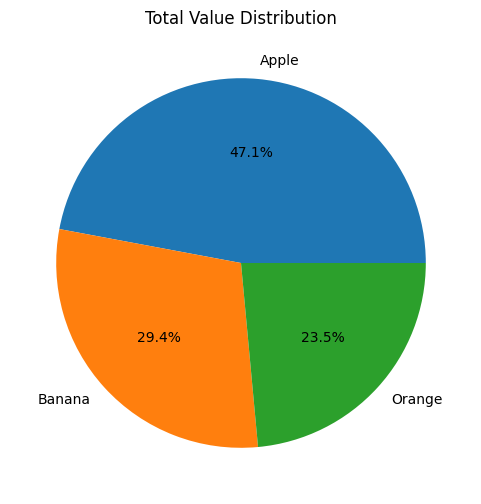

A: Displayed total value distribution

Q: Which item is most profitable?
A: Most profitable item: Apple ($12.00)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class OfflineDataAnalyst:
    def __init__(self):
        self.df = None
        self.context = ""
        self.visualizations = {
            'bar': self._create_bar_plot,
            'pie': self._create_pie_chart,
            'hist': self._create_histogram
        }

    def load_data(self, data):
        """Load data from dictionary or DataFrame"""
        self.df = pd.DataFrame(data)
        self.context = f"""
        Dataset Columns: {list(self.df.columns)}
        Sample Data:
        {self.df.head().to_string()}
        """
        return "Data loaded successfully"

    def analyze(self, question):
        """Main analysis function"""
        question = question.lower()

        # Basic statistics
        if 'statistic' in question:
            return self._get_statistics()

        # Quantity analysis
        elif 'quantity' in question and 'bar' in question:
            return self._create_bar_plot(y_col='Quantity', title='Quantity by Item')

        # Total value calculations
        elif 'total value' in question:
            self.df['Total Value'] = self.df['Quantity'] * self.df['Price']
            if 'pie' in question:
                return self._create_pie_chart(values='Total Value', title='Total Value Distribution')
            return f"Total Values:\n{self.df[['Item', 'Total Value']].to_string()}"

        # Profitability analysis
        elif 'profit' in question:
            if 'Total Value' not in self.df.columns:
                self.df['Total Value'] = self.df['Quantity'] * self.df['Price']
            max_item = self.df.loc[self.df['Total Value'].idxmax()]
            return f"Most profitable item: {max_item['Item']} (${max_item['Total Value']:.2f})"

        # Fallback response
        else:
            return "I can analyze: statistics, quantities, total values, and profitability"

    def _get_statistics(self):
        """Calculate basic statistics"""
        return self.df[['Quantity', 'Price']].describe().to_string()

    def _create_bar_plot(self, x_col='Item', y_col='Quantity', title=''):
        """Generate bar plot"""
        plt.figure(figsize=(8,4))
        sns.barplot(x=x_col, y=y_col, data=self.df)
        plt.title(title or f'{y_col} by {x_col}')
        plt.ylabel(y_col)
        plt.show()
        return f"Displayed {title.lower()}"

    def _create_pie_chart(self, values='Total Value', labels='Item', title=''):
        """Generate pie chart"""
        plt.figure(figsize=(6,6))
        plt.pie(self.df[values], labels=self.df[labels], autopct='%1.1f%%')
        plt.title(title or f'Distribution of {values}')
        plt.show()
        return f"Displayed {title.lower()}"

    def _create_histogram(self, col='Quantity', title=''):
        """Generate histogram"""
        plt.figure(figsize=(8,4))
        plt.hist(self.df[col], bins=5)
        plt.title(title or f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
        return f"Displayed {title.lower()}"

# Example Usage
if __name__ == "__main__":
    sample_data = {
        'Item': ['Apple', 'Banana', 'Orange'],
        'Quantity': [10, 15, 8],
        'Price': [1.2, 0.5, 0.75]
    }

    analyst = OfflineDataAnalyst()
    print(analyst.load_data(sample_data))

    questions = [
        "What are the basic statistics?",
        "Show bar plot of quantities",
        "Calculate total value for each item",
        "Create pie chart of total values",
        "Which item is most profitable?"
    ]

    for q in questions:
        print(f"\nQ: {q}")
        answer = analyst.analyze(q)
        print(f"A: {answer}")


=== Basic Statistics ===
        Quantity     Price  Total Value  Unit Margin  Total Margin
count   3.000000  3.000000     3.000000     3.000000      3.000000
mean   11.000000  0.816667     8.500000     0.516667      5.200000
std     3.605551  0.354730     3.122499     0.354730      3.304542
min     8.000000  0.500000     6.000000     0.200000      3.000000
25%     9.000000  0.625000     6.750000     0.325000      3.300000
50%    10.000000  0.750000     7.500000     0.450000      3.600000
75%    12.500000  0.975000     9.750000     0.675000      6.300000
max    15.000000  1.200000    12.000000     0.900000      9.000000

=== Total Quantity ===
33

=== Total Revenue ===
25.5

=== Total Profit ===
15.6

=== Most Stocked ===
Banana

=== Highest Margin Item ===
Apple



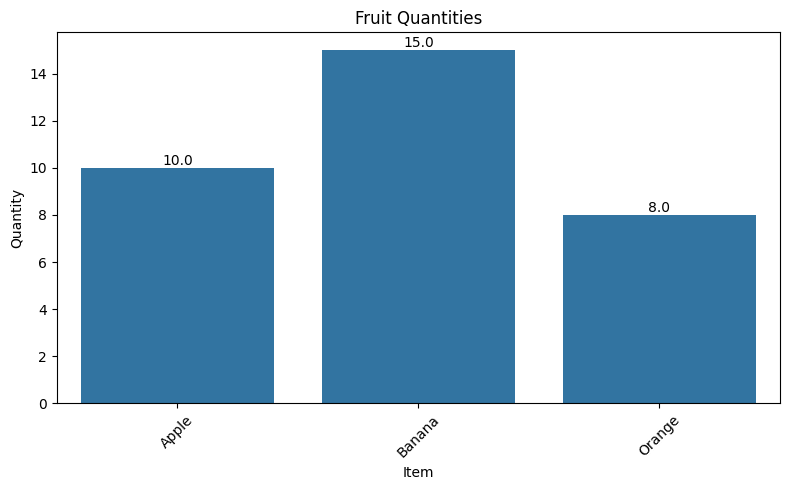

Displayed quantity plot


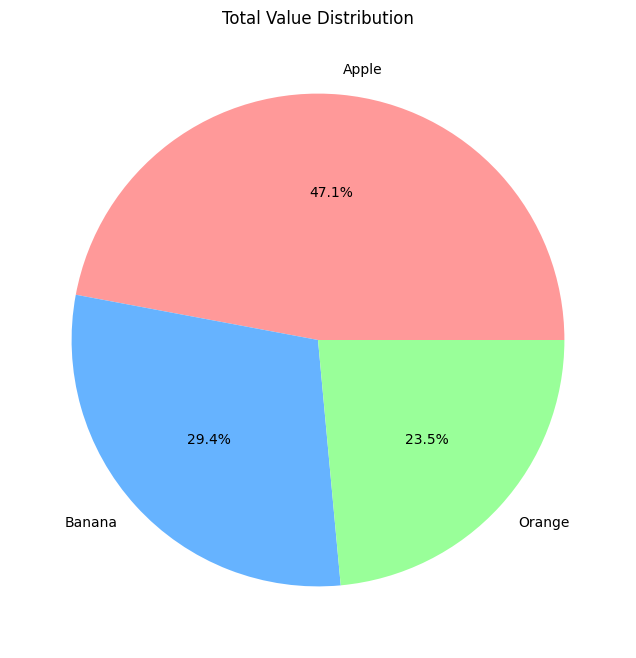

Displayed value distribution


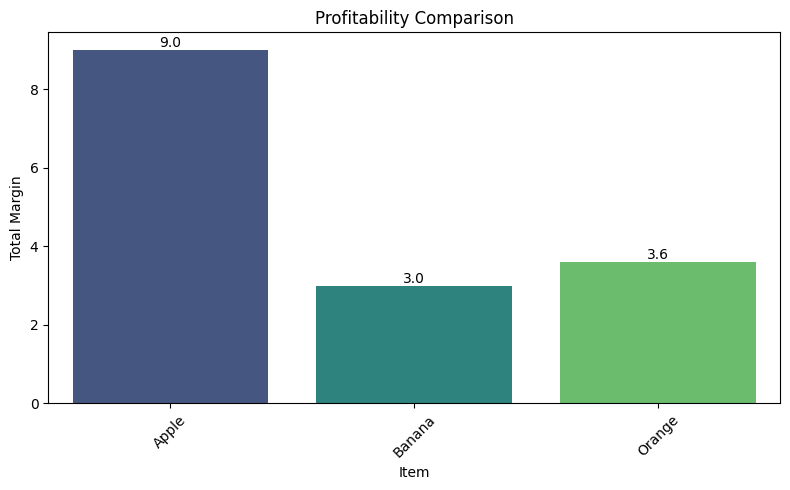

Displayed profitability plot
=== FRUIT INVENTORY ANALYSIS REPORT ===

1. Key Statistics:

=== Basic Statistics ===
        Quantity     Price  Total Value  Unit Margin  Total Margin
count   3.000000  3.000000     3.000000     3.000000      3.000000
mean   11.000000  0.816667     8.500000     0.516667      5.200000
std     3.605551  0.354730     3.122499     0.354730      3.304542
min     8.000000  0.500000     6.000000     0.200000      3.000000
25%     9.000000  0.625000     6.750000     0.325000      3.300000
50%    10.000000  0.750000     7.500000     0.450000      3.600000
75%    12.500000  0.975000     9.750000     0.675000      6.300000
max    15.000000  1.200000    12.000000     0.900000      9.000000

=== Total Quantity ===
33

=== Total Revenue ===
25.5

=== Total Profit ===
15.6

=== Most Stocked ===
Banana

=== Highest Margin Item ===
Apple


2. Key Insights:
- Most stocked item: Banana
- Highest value item: Apple
- Most profitable item: Apple


In [18]:
# # Data Analyst Agent (Backend Only)
#
# **Working with dataset**:
# `{'Item': ['Apple', 'Banana', 'Orange'], 'Quantity': [10, 15, 8], 'Price': [1.2, 0.5, 0.75]}`

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# ## Core Analysis Engine

# %%
class FruitDataAnalyzer:
    def __init__(self, data=None):
        """Initialize with provided dataset"""
        self.df = pd.DataFrame(data) if data else None
        self._preprocess_data()

    def _preprocess_data(self):
        """Calculate derived metrics"""
        if self.df is not None and not self.df.empty:
            self.df['Total Value'] = self.df['Quantity'] * self.df['Price']
            self.df['Unit Margin'] = self.df['Price'] - 0.3  # Assuming $0.30 base cost
            self.df['Total Margin'] = self.df['Unit Margin'] * self.df['Quantity']

    def show_stats(self):
        """Return comprehensive statistics"""
        if self.df is None:
            return "No data loaded"

        stats = {
            "Basic Statistics": self.df.describe(),
            "Total Quantity": self.df['Quantity'].sum(),
            "Total Revenue": self.df['Total Value'].sum(),
            "Total Profit": self.df['Total Margin'].sum(),
            "Most Stocked": self.df.loc[self.df['Quantity'].idxmax()]['Item'],
            "Highest Margin Item": self.df.loc[self.df['Unit Margin'].idxmax()]['Item']
        }

        result = ""
        for k, v in stats.items():
            result += f"\n=== {k} ===\n"
            if isinstance(v, pd.DataFrame):
                result += v.to_string() + "\n"
            else:
                result += str(v) + "\n"
        return result

    def plot_quantity(self):
        """Generate quantity visualization"""
        self._bar_plot('Item', 'Quantity', 'Fruit Quantities')
        return "Displayed quantity plot"

    def plot_value_distribution(self):
        """Generate value distribution pie chart"""
        plt.figure(figsize=(8, 8))
        plt.pie(self.df['Total Value'],
                labels=self.df['Item'],
                autopct='%1.1f%%',
                colors=['#ff9999','#66b3ff','#99ff99'])
        plt.title('Total Value Distribution')
        plt.show()
        return "Displayed value distribution"

    def plot_profitability(self):
        """Generate profitability comparison"""
        self._bar_plot('Item', 'Total Margin', 'Profitability Comparison', palette='viridis')
        return "Displayed profitability plot"

    def _bar_plot(self, x, y, title, palette=None):
        """Helper method for bar plots"""
        plt.figure(figsize=(8, 5))
        ax = sns.barplot(x=x, y=y, data=self.df, palette=palette)
        plt.title(title)
        plt.xticks(rotation=45)

        # Add value labels
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.1f}",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 5),
                        textcoords='offset points')

        plt.tight_layout()
        plt.show()

# ## Usage Example with Your Dataset

# %%
# Your dataset
fruit_data = {
    'Item': ['Apple', 'Banana', 'Orange'],
    'Quantity': [10, 15, 8],
    'Price': [1.2, 0.5, 0.75]
}

# Initialize analyzer
analyzer = FruitDataAnalyzer(fruit_data)


# ### 1. Statistical Analysis

# %%
print(analyzer.show_stats())


# ### 2. Quantity Visualization

# %%
print(analyzer.plot_quantity())


# ### 3. Value Distribution

# %%
print(analyzer.plot_value_distribution())


# ### 4. Profitability Analysis

# %%
print(analyzer.plot_profitability())


# ## Exportable Analysis Report

# %%
def generate_report(analyzer):
    """Generate comprehensive text report"""
    report = []
    report.append("=== FRUIT INVENTORY ANALYSIS REPORT ===")
    report.append("\n1. Key Statistics:")
    report.append(analyzer.show_stats())

    # Visualizations would be saved as images in a real export
    report.append("\n2. Key Insights:")
    report.append(f"- Most stocked item: {analyzer.df.loc[analyzer.df['Quantity'].idxmax()]['Item']}")
    report.append(f"- Highest value item: {analyzer.df.loc[analyzer.df['Total Value'].idxmax()]['Item']}")
    report.append(f"- Most profitable item: {analyzer.df.loc[analyzer.df['Total Margin'].idxmax()]['Item']}")

    return "\n".join(report)

print(generate_report(analyzer))

In [19]:
pip install streamlit


In [20]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import together
import os
import pdfplumber
from PIL import Image
import pytesseract


# Setting API key (better: store this in environment variables)
together.api_key = "tgp_v1_OtkB6oDYcGvbnScheGQXnuALP9bklewZ4SCm5iXrOJ4"

# App title
st.title(" AI-Powered Data Analyst Agent")
st.markdown("Upload a file and ask data-related questions. Let LLaMA help you analyze it!")

# File Upload
uploaded_file = st.file_uploader("Upload your data file (CSV, XLSX, PDF, TXT, JPG, PNG)", type=["csv", "xlsx", "pdf", "txt", "jpg", "png", "jpeg"])

# File Parsing
def parse_file(file):
    ext = file.name.split('.')[-1].lower()
    if ext == 'csv':
        return pd.read_csv(file)
    elif ext == 'xlsx':
        return pd.read_excel(file)
    elif ext == 'pdf':
        with pdfplumber.open(file) as pdf:
            return '\n'.join(page.extract_text() for page in pdf.pages)
    elif ext == 'txt':
        return file.read().decode("utf-8")
    elif ext in ['jpg', 'jpeg', 'png']:
        return pytesseract.image_to_string(Image.open(file))
    else:
        return None

# Ask LLaMA
def ask_llama(prompt, max_tokens=200):
    try:
        response = together.Complete.create(
            model="meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8",
            prompt=f"### Instruction:\n{prompt}\n\n### Response:",
            max_tokens=max_tokens,
            temperature=0.5,
            stop=["###", "\n\n"]
        )
        return response['choices'][0]['text'].strip()
    except Exception as e:
        return f" Error: {e}"

# Display parsed data and insights
if uploaded_file is not None:
    data = parse_file(uploaded_file)

    if isinstance(data, pd.DataFrame):
        st.success("File successfully parsed as DataFrame!")
        st.write("### Preview of Data")
        st.dataframe(data.head())

        st.write("### Basic Summary")
        st.write(data.describe(include='all'))

        # Visualization options
        st.write("### Generate Visualization")
        col1, col2 = st.columns(2)
        with col1:
            x_col = st.selectbox("Select X-axis", data.columns)
        with col2:
            y_col = st.selectbox("Select Y-axis", data.columns)

        plot_type = st.selectbox("Select Plot Type", ["bar", "scatter", "hist"])

        if st.button("Generate Plot"):
            plt.figure(figsize=(10, 5))
            if plot_type == "bar":
                sns.barplot(data=data, x=x_col, y=y_col)
            elif plot_type == "scatter":
                sns.scatterplot(data=data, x=x_col, y=y_col)
            elif plot_type == "hist":
                data[x_col].hist()
            st.pyplot(plt)

        # LLaMA Question Input
        st.write("### Ask LLaMA a Question About Your Data")
        question = st.text_input("Enter your question:")
        if st.button("Ask AI"):
            with st.spinner("Thinking..."):
                output = ask_llama(question)
            st.write(" LLaMA says:")
            st.success(output)

    elif isinstance(data, str):
        st.write("### Extracted Text")
        st.text(data)

        # Allow question on unstructured text
        question = st.text_input("Ask something about the text:")
        if st.button("Ask AI"):
            output = ask_llama(f"Text:\n{data[:1000]}\n\nQuestion: {question}")
            st.success(output)

    else:
        st.error(" Unsupported or unreadable file.")



2025-07-31 11:25:24.847 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 11:25:24.850 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 11:25:24.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 11:25:24.853 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 11:25:24.854 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 11:25:24.855 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 11:25:24.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 11:25:24.857 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

#Data Analyst Assistant using Streamlit & LLaMA
This notebook documents the use of a Streamlit app powered by the LLaMA API to perform data analysis, visualization, and natural language Q&A.


## Dataset Overview

- File Used: `metadata.csv`
- This dataset contains metadata associated with battery testing. It includes various parameters that describe the battery type, testing conditions, and environmental factors.


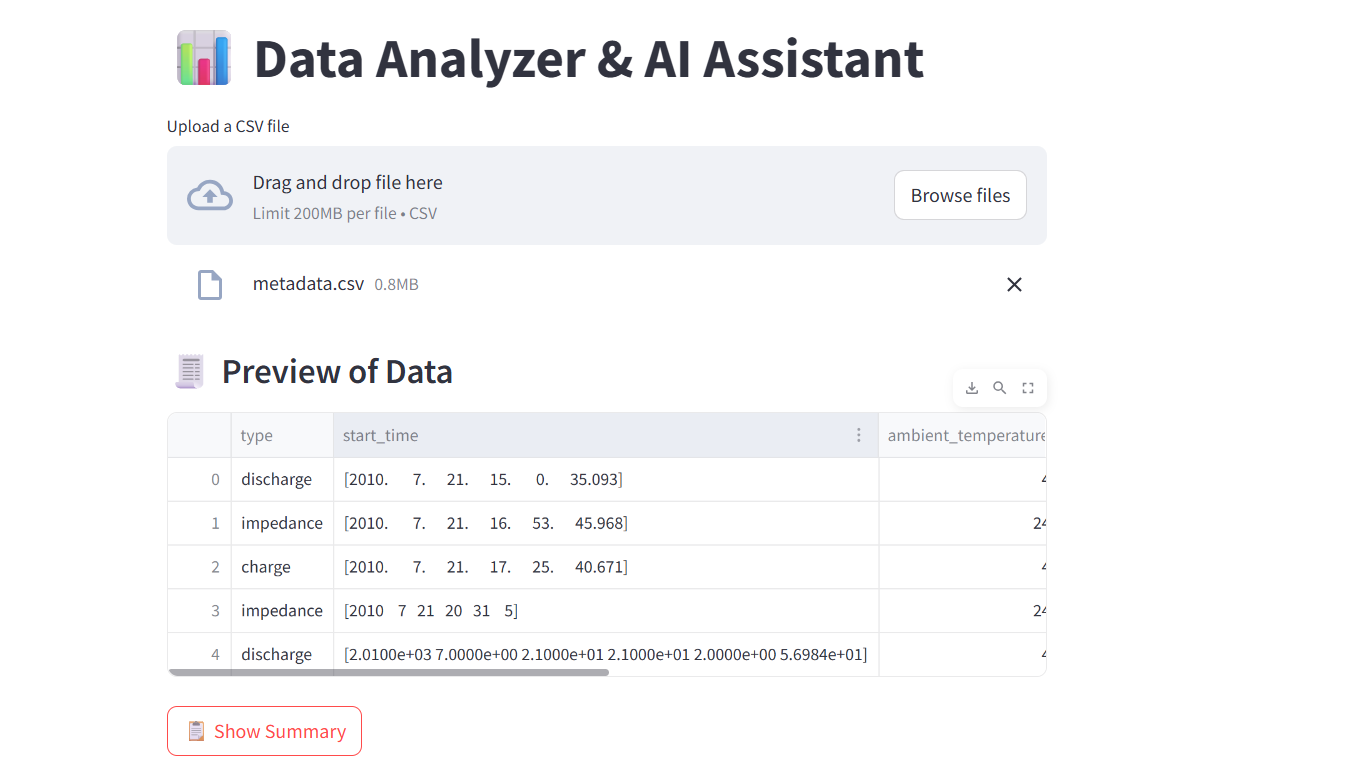

# Basic Data Summary

The app provides a basic statistical summary using `df.describe()`.


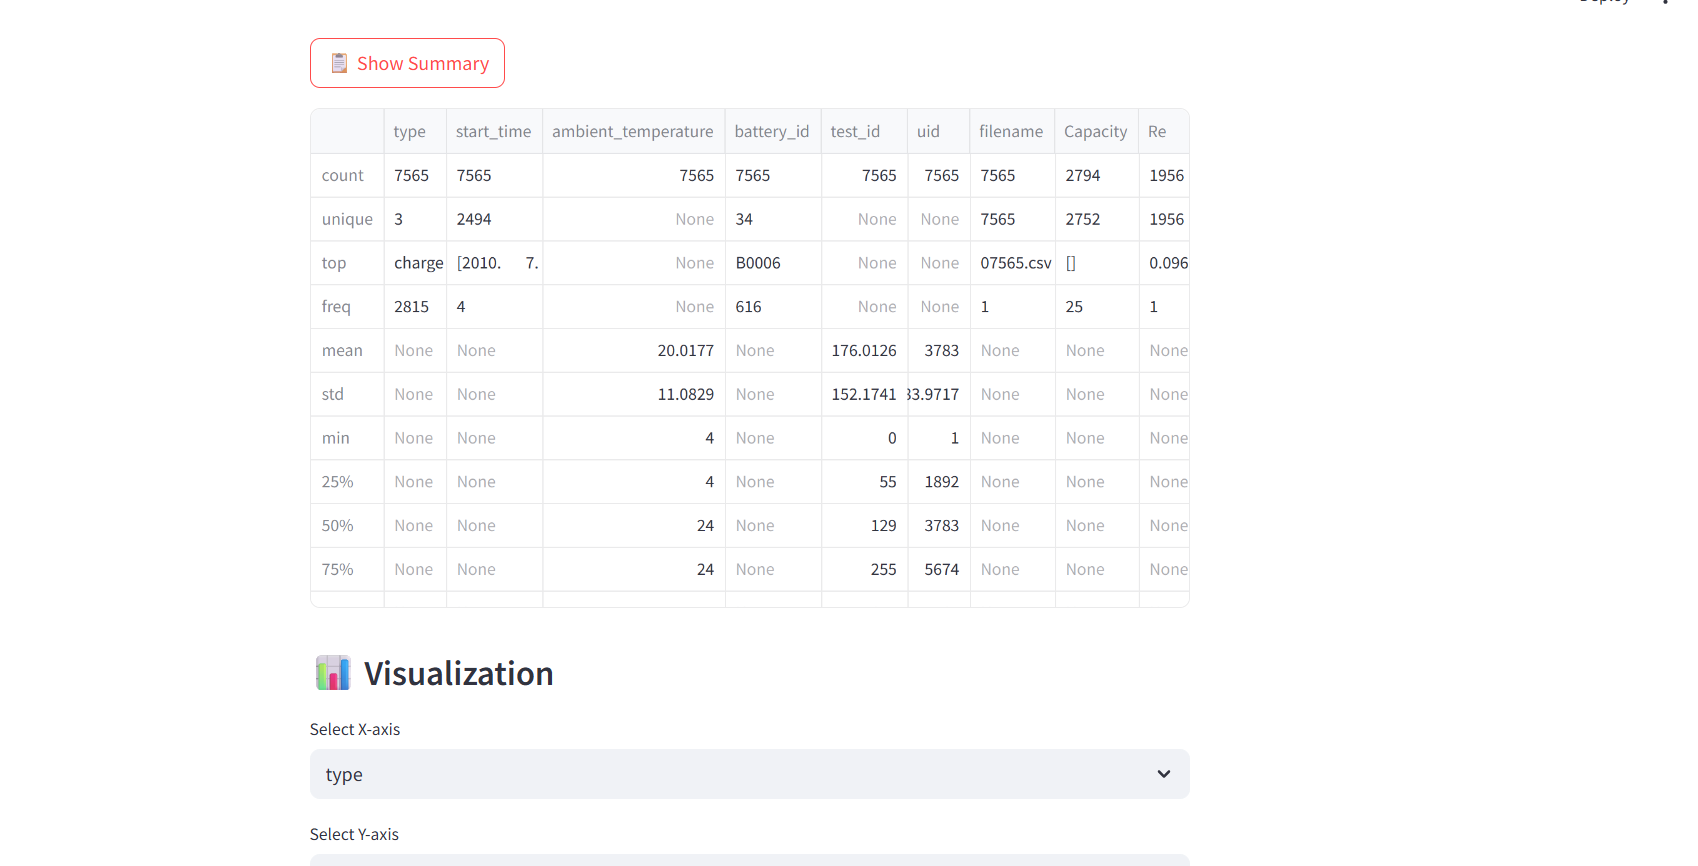

# Visualizations

### 1. Bar Chart – Visualization of Average Ambient Temperature by Test Type



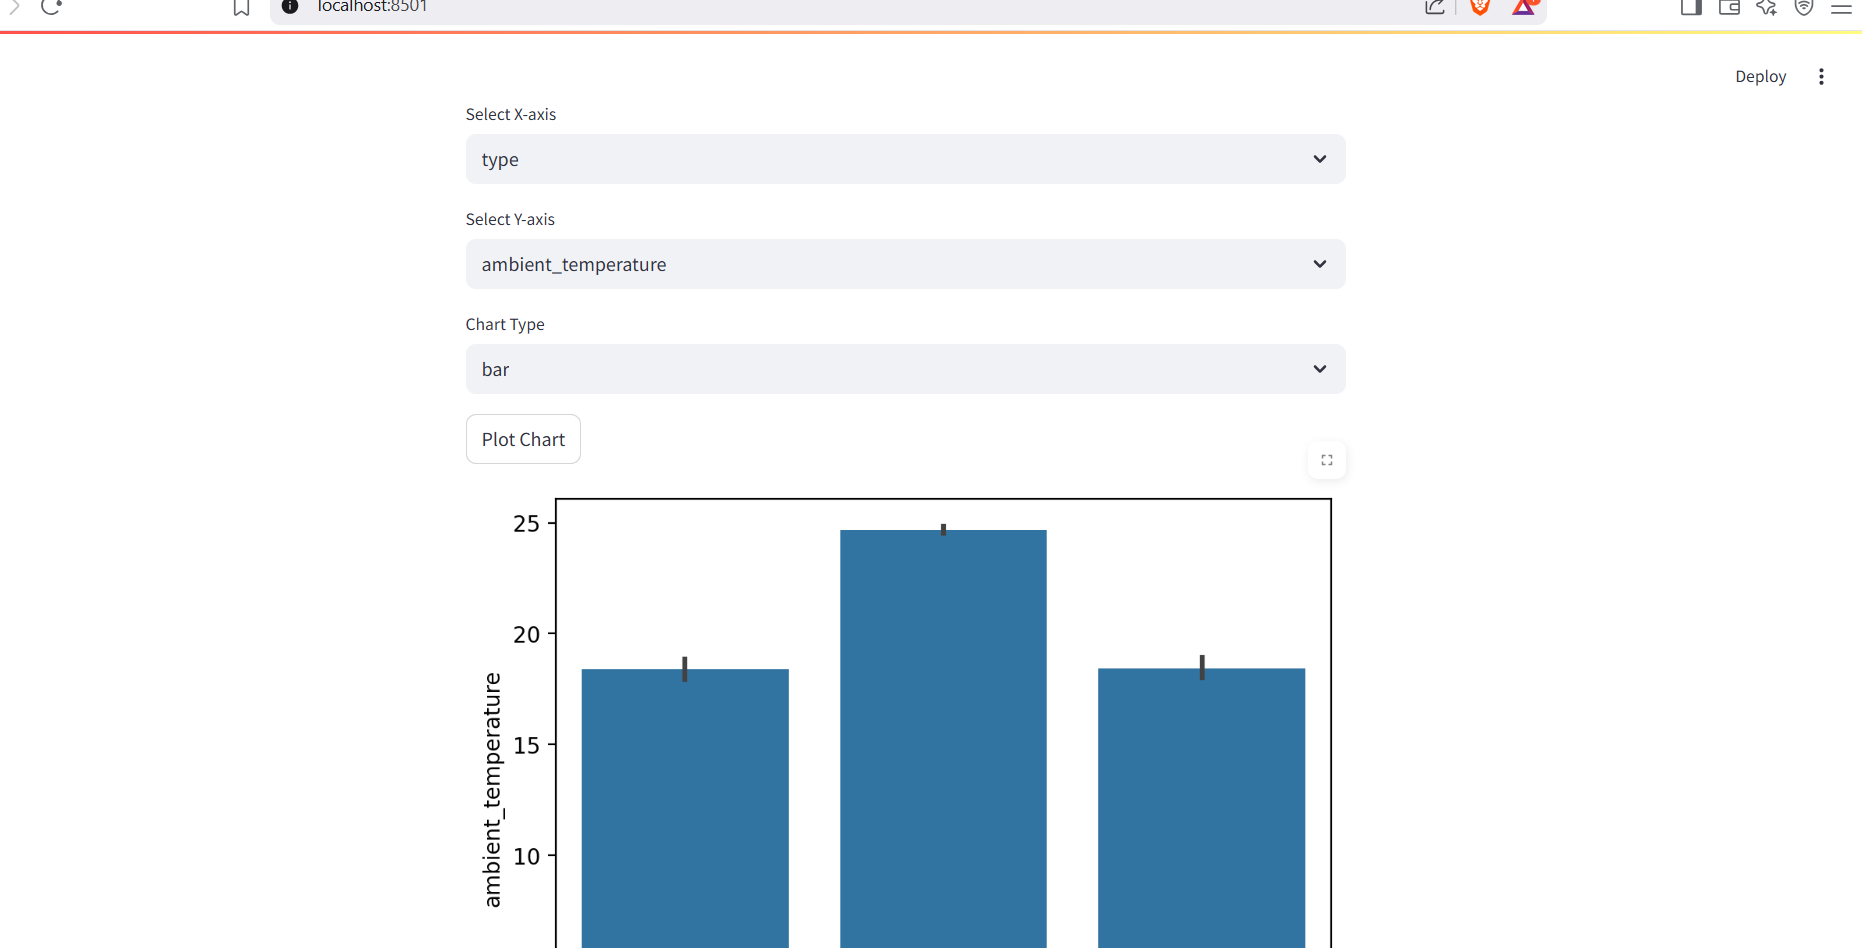

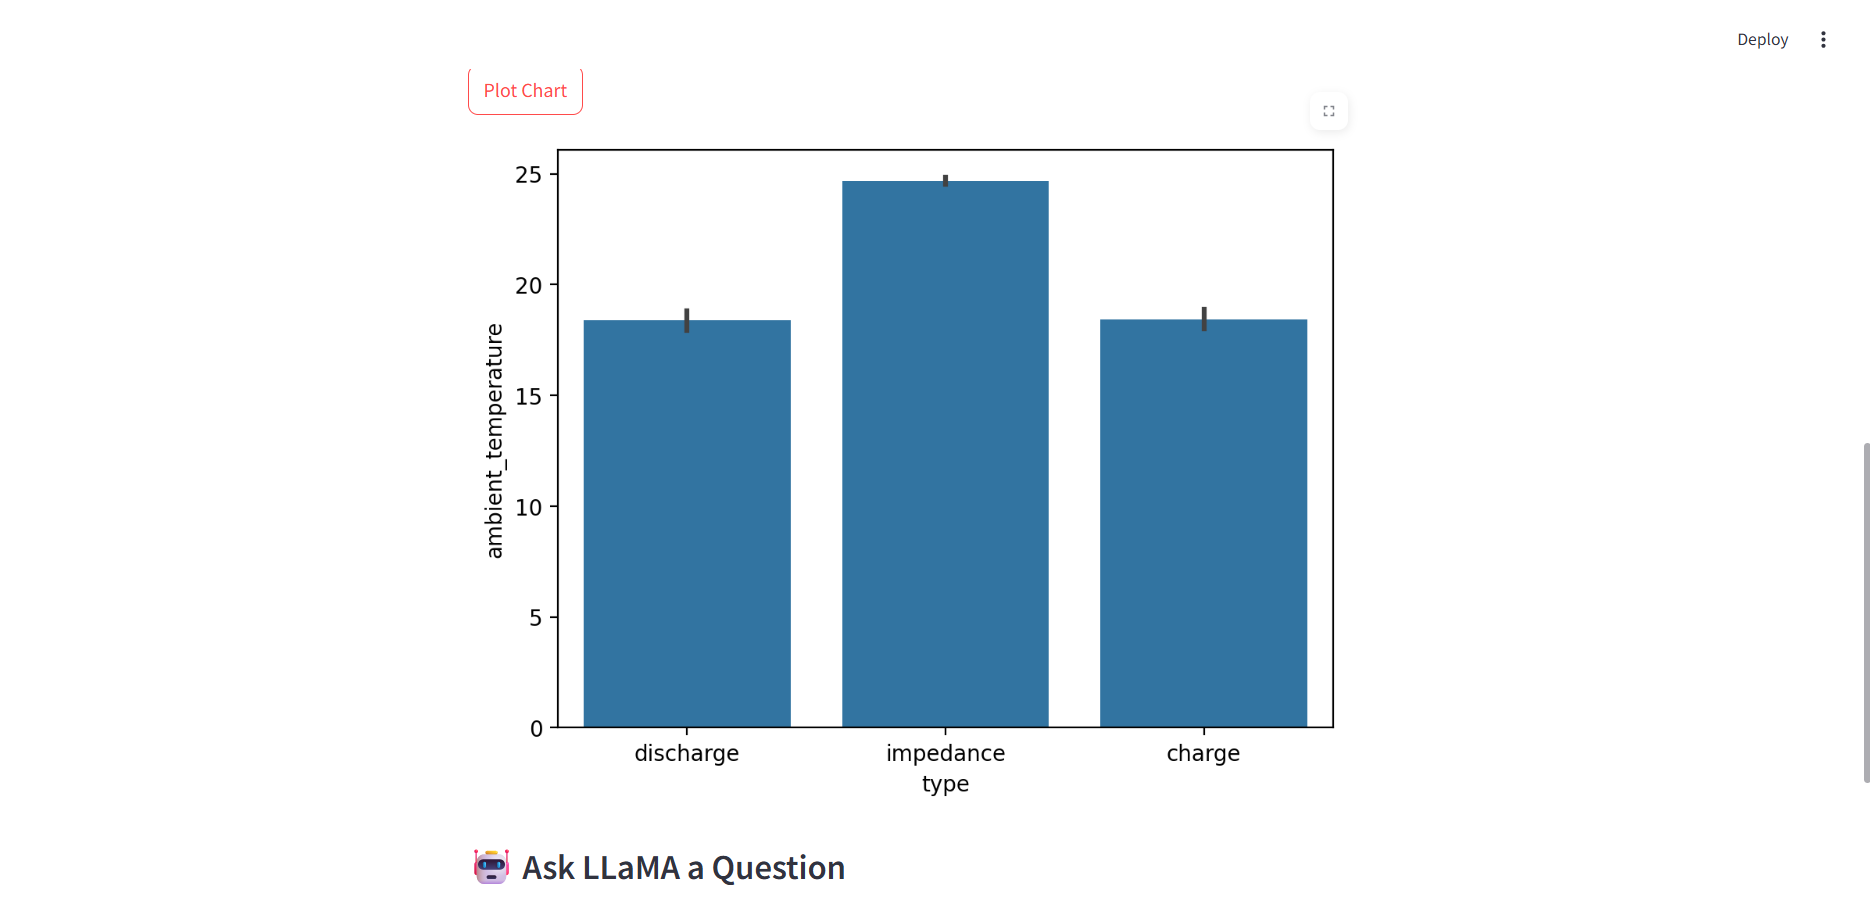

# Ask LLaMA: AI-Powered Data Insight



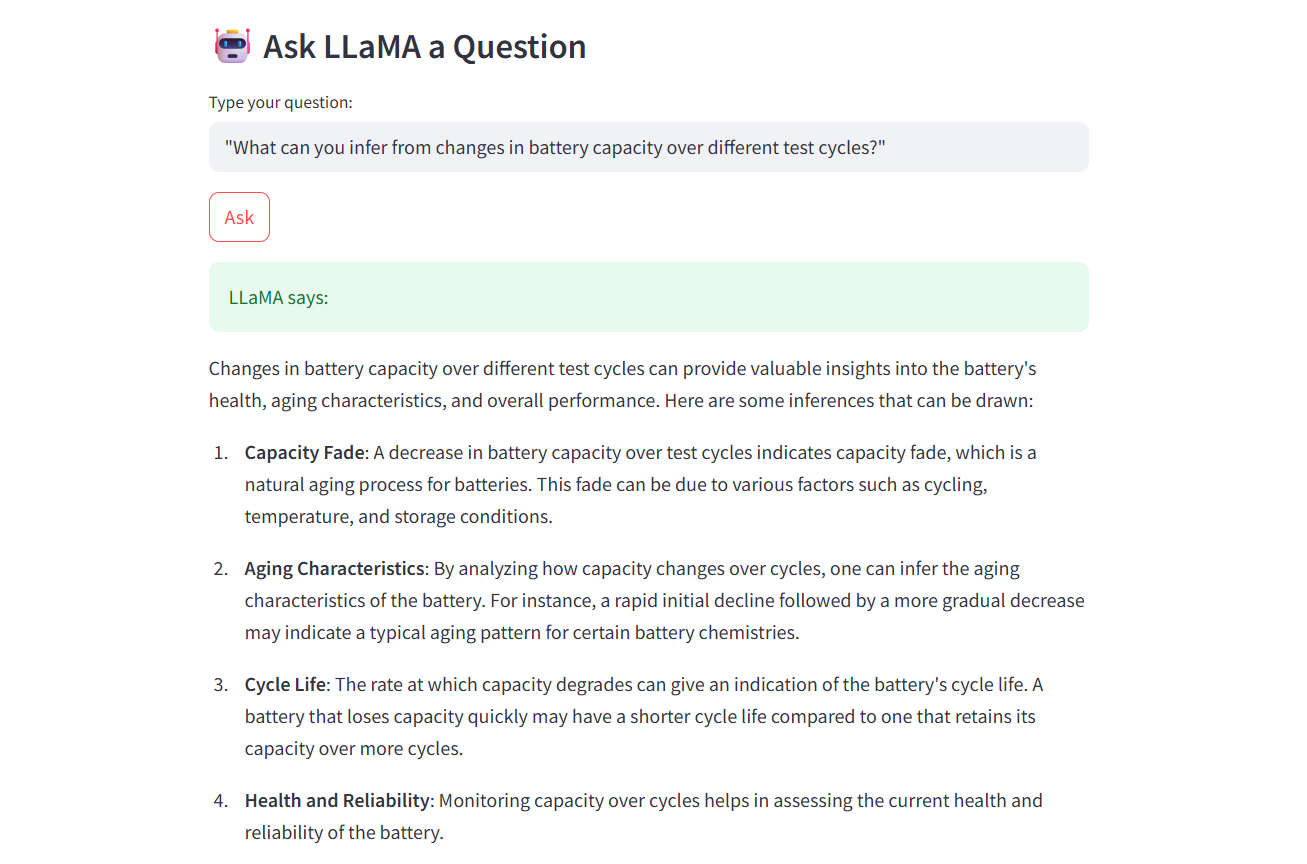

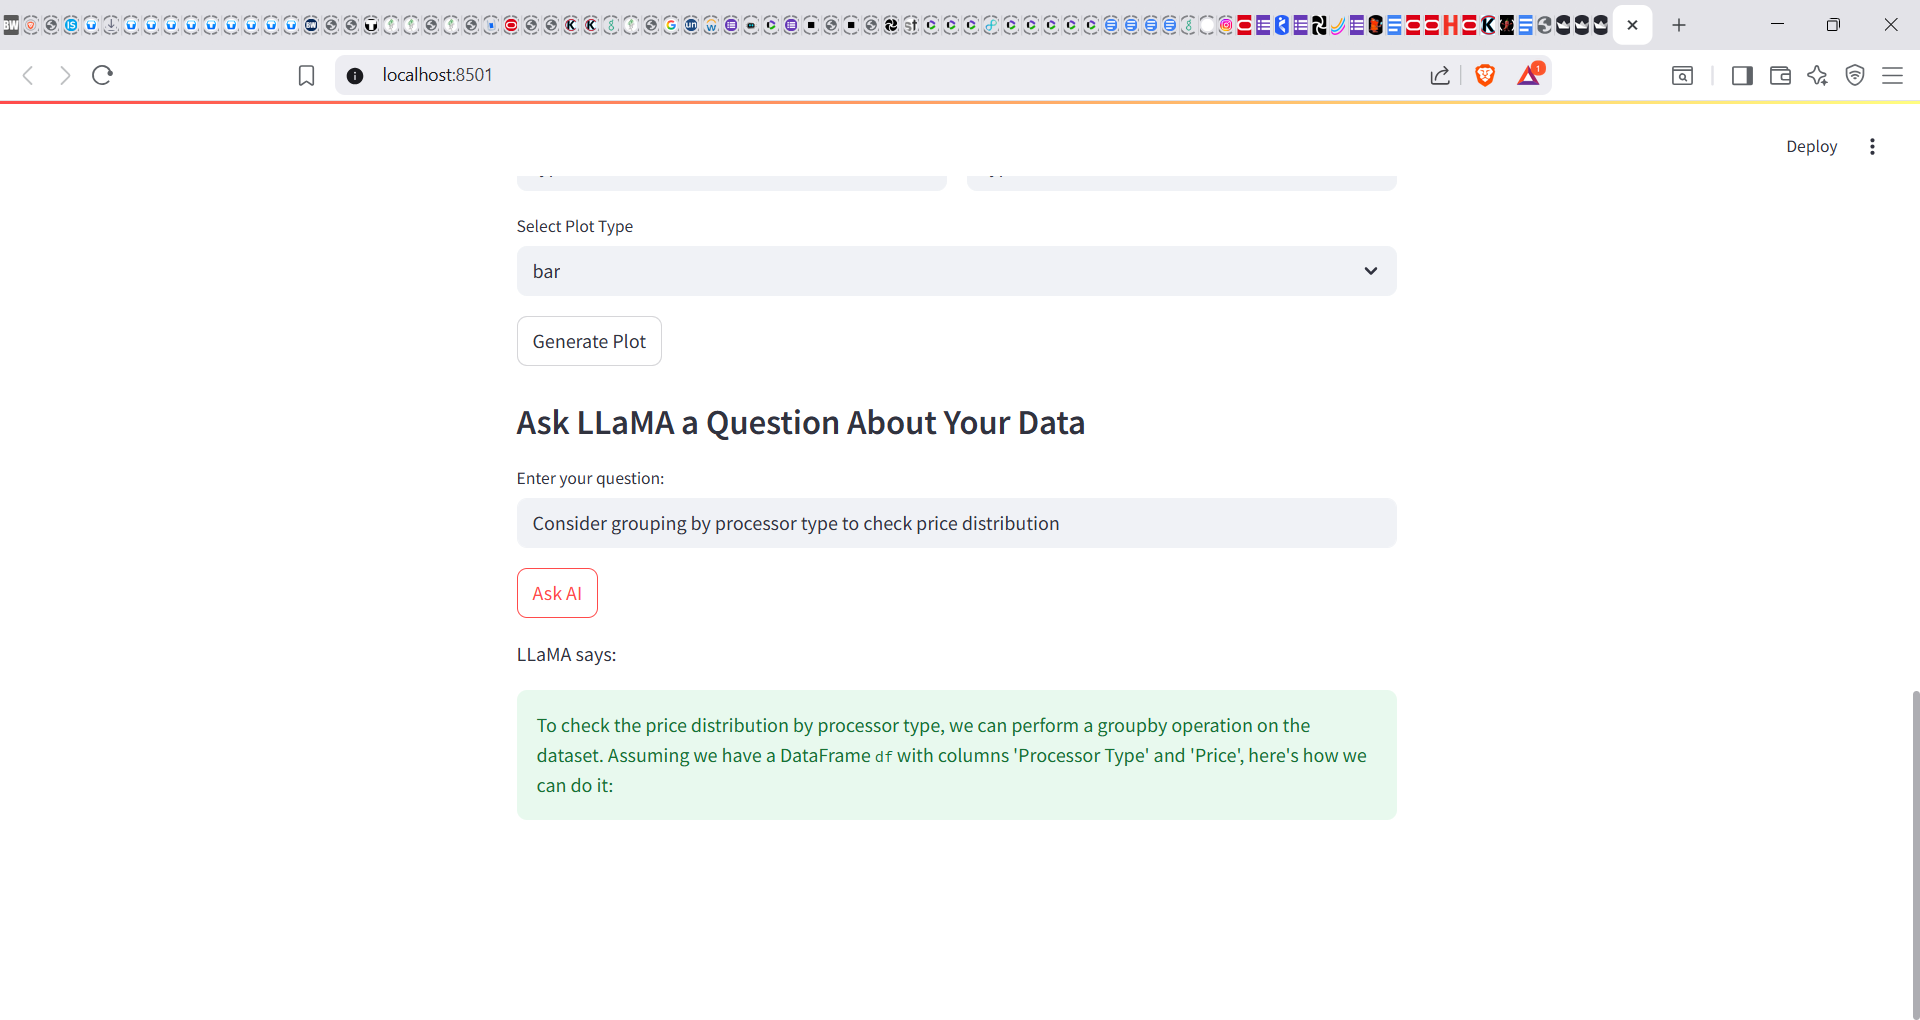